In [ ]:
#Code to plot both non-perturbative and tidal limit \Delta E_{int} vs impact parameter for different values of rp/rs

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math
import random
from matplotlib.patches import Rectangle
from matplotlib import cm
import matplotlib.colors as colors
from matplotlib.pylab import *
from matplotlib.colors import LogNorm
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.ticker as ticker
from matplotlib.patches import BoxStyle
from scipy import integrate
from scipy import optimize
from scipy.optimize import fsolve
from scipy.interpolate import CubicSpline,interp1d
from scipy.special import erf as errorfunc
from scipy.special import gamma, factorial
from scipy.signal import argrelextrema 
from matplotlib import cm
from numpy import linalg
import time
import os
import h5py
import string
from straight_functions_spherical_perturber import *

#-----------------------------------------------------------------



In [3]:
#-------Input parameters-------

#Scale radius of perturber in units of rs (scale radius of subject)
Nrp=3                        #No of points in rp
rpmin=1e-1                   #Minimum rp
rpmax=1e1                    #Maximum rp
rp=np.logspace(np.log10(rpmin),np.log10(rpmax),num=Nrp) #rp

bmin=0.01                    #Minimum impact parameter #0.01
bmax=100                     #Maximum impact parameter
Nb=100                       #No of points in impact parameter range

perturber_flag=2             #perturber_flag: 1: Point mass, 2: Plummer sphere, 3: Hernquist sphere, 4: NFW, 5: Isochrone
subject_flag=2               #subject_flag: 1: Plummer sphere, 2: Hernquist sphere, 3: NFW

In [ ]:
#-------Loading data-------

Eint=np.zeros((Nrp,Nb))
Eint_trunc=np.zeros((Nrp,Nb))
Etidal=np.zeros((Nrp,Nb))
Etidal_pt=np.zeros((Nrp,Nb))
Eint0=np.zeros(Nrp)
Eint0_trunc=np.zeros(Nrp)

hf = h5py.File('data/impulsive_straight_orbit_deltaE_perturber%d_subject%d_%.4f.h5' %(perturber_flag,subject_flag,rp[0]), 'r')
impact=np.array(hf.get('impact'))
hf.close()

for i in range(Nrp):
    hf = h5py.File('data/impulsive_straight_orbit_deltaE_perturber%d_subject%d_%.4f.h5' %(perturber_flag,subject_flag,rp[i]), 'r')
    Eint[i]=np.array(hf.get('Eint'))
    Eint_trunc[i]=np.array(hf.get('Eint_trunc'))
    Etidal[i]=np.array(hf.get('Etidal'))
    Etidal_pt[i]=np.array(hf.get('Etidal_pt'))
    Eint0[i]=np.array(hf.get('Eint0'))
    Eint0_trunc[i]=np.array(hf.get('Eint0_trunc'))
    hf.close()

/home/uddipan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/home/uddipan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


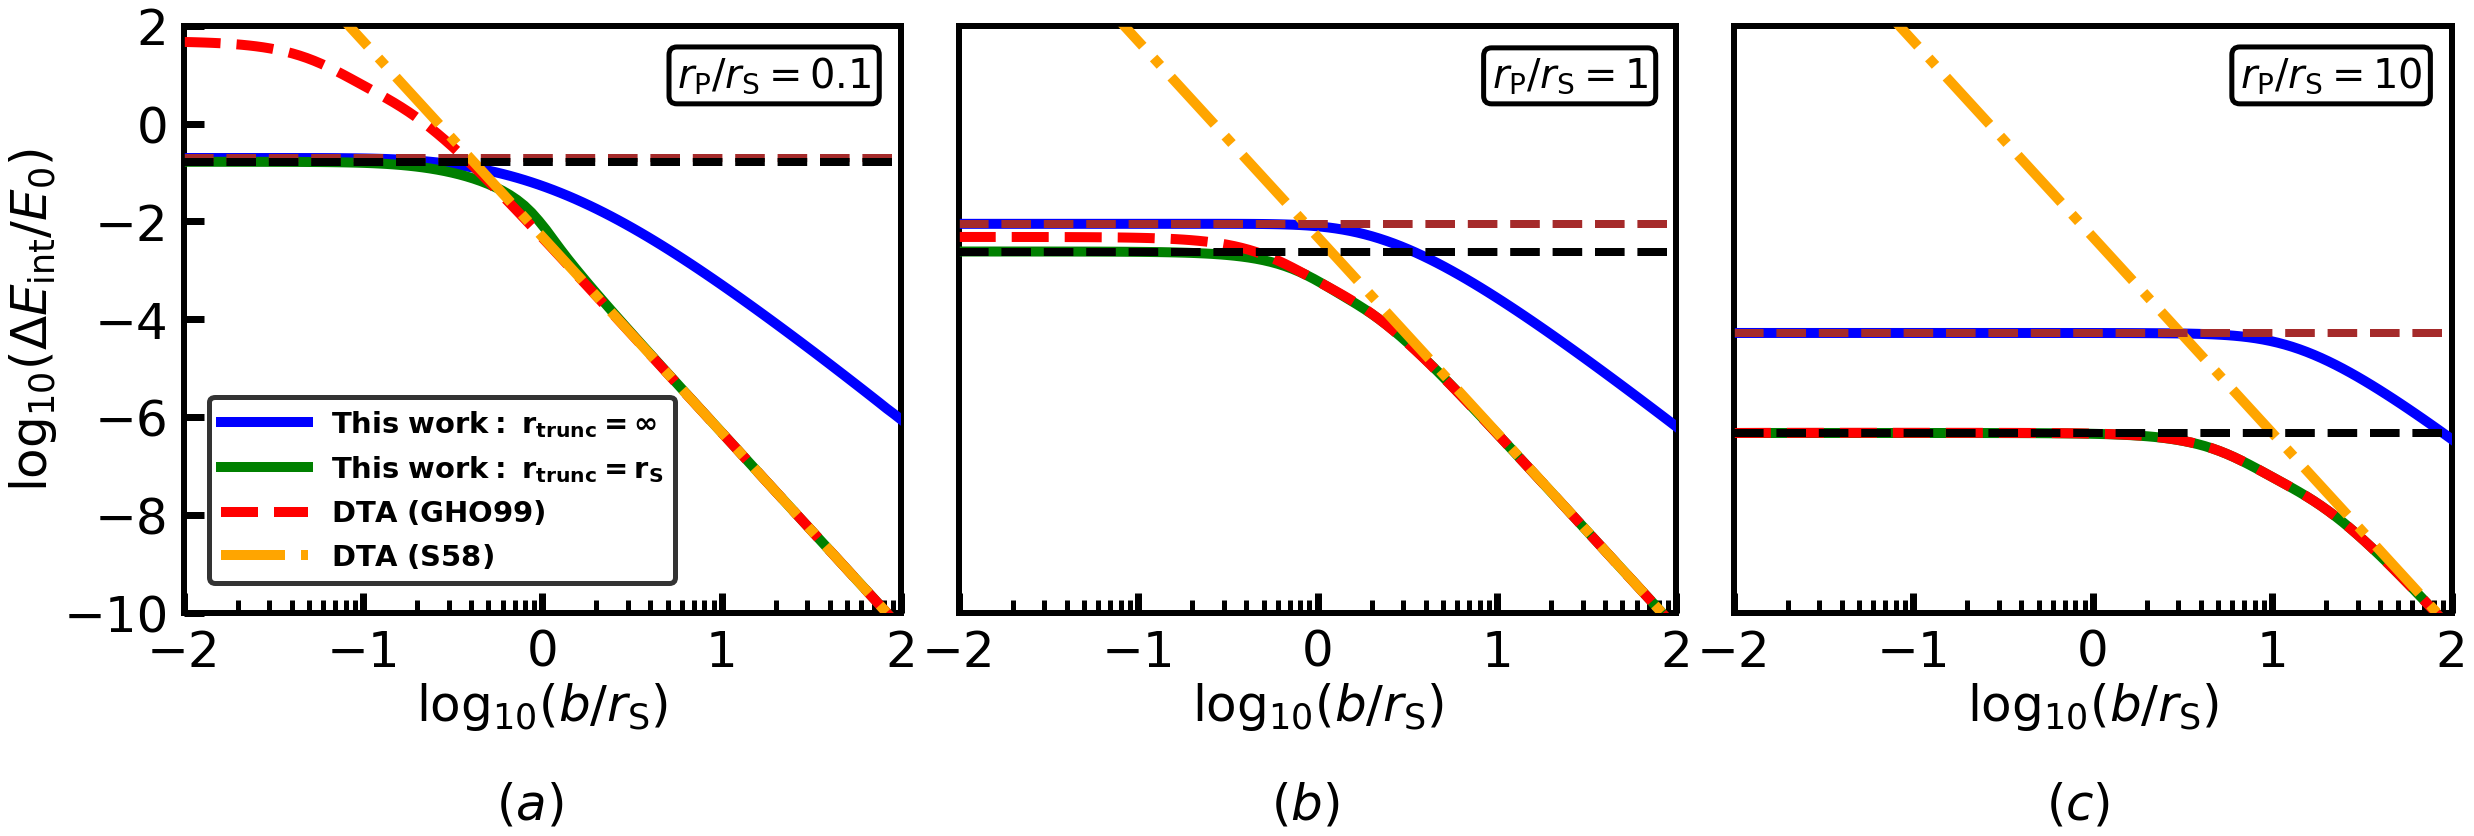

In [26]:
#-------Plot-------

fig,ax=plt.subplots(1,3,figsize=(35,12))
plt.subplots_adjust(top=0.95,bottom=0.27,left=0.08,right=0.98,wspace=0.08)

for i in range(Nrp):
    ax[i].plot(np.log10(impact),np.log10(Eint[i]),color='b',lw=10,label='$\mathbf{This}$ $\mathbf{work:}$ $\mathbf{r}_{\mathrm{\mathbf{trunc}}}\mathbf{=\infty}$')
    ax[i].plot(np.log10(impact),np.log10(Eint_trunc[i]),color='g',lw=10,label='$\mathbf{This}$ $\mathbf{work:}$ $\mathbf{r}_{\mathrm{\mathbf{trunc}}}\mathbf{=r}_{\mathrm{\mathbf{S}}}$')
    ax[i].plot(np.log10(impact),np.log10(Etidal[i]),color='r',lw=10,ls='--',label='$\mathbf{DTA}$ $\mathbf{(GHO99)}$')
    ax[i].plot(np.log10(impact),np.log10(Etidal_pt[i]),color='orange',lw=10,ls='-.',label='$\mathbf{DTA}$ $\mathbf{(S58)}$')
    
    if (perturber_flag==2):
        ax[i].axhline(y=np.log10(Eint0[i]),color='brown',lw=8,ls='--')
        ax[i].axhline(y=np.log10(Eint0_trunc[i]),color='k',lw=8,ls='--')
    
    #ax[i].xaxis.set_minor_locator(AutoMinorLocator(4))
    ax[i].set_xticks(np.linspace(np.log10(bmin),np.log10(bmax),(int)(np.log10(bmax)-np.log10(bmin)+1)))
    xt_base=np.linspace(2,9,8)
    xt1=(-2)*np.ones(8)+np.log10(xt_base)
    xt2=(-1)*np.ones(8)+np.log10(xt_base)
    xt3=np.log10(xt_base)
    xt4=np.ones(8)+np.log10(xt_base)
    xt5=2*np.ones(8)+np.log10(xt_base)
    xt=np.array(xt1.tolist()+xt2.tolist()+xt3.tolist()+xt4.tolist()+xt5.tolist())
    ax[i].set_xticks(xt, minor=True)
    #labels = [item.get_text() for item in ax[i].get_xticklabels()]
    #labels = np.arange((int)(np.log10(bmin)),(int)(np.log10(bmax)+1))
    #ax[i].set_xticklabels(labels)
    ax[i].tick_params(which='major', direction='in', width=7, length=20, color='k', pad=15)
    ax[i].tick_params(which='minor', direction='in', width=5, length=13, color='k', pad=15)
    
    #ax[i].get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax.get_yaxis().set_major_formatter(matplotlib.ticker.NullFormatter())
    
    if (i==0):
        #ax[i].yaxis.set_minor_locator(AutoMinorLocator(4))
        ax[i].set_yticks(np.linspace(-10,2,7))
        #labels = [item.get_text() for item in ax[i].get_xticklabels()]
        #labels = np.arange(-10,3,2)
        #ax[i].set_yticklabels(labels)
        ax[i].set_ylabel('$\log_{10}{\left(\Delta E_{\mathrm{int}}/E_0\\right)}$',fontsize=50)
        leg=ax[i].legend(bbox_to_anchor=[0.36, 0.21],loc='center',handlelength=3,fontsize=29)
        leg.get_frame().set_edgecolor('k')
        leg.get_frame().set_linewidth('5.0')
    else:    
        ax[i].set_yticks([],[])

    ax[i].set_xlim([np.log10(bmin),np.log10(bmax)])
    ax[i].set_ylim([-10,2])
    ax[i].tick_params(labelsize=50)
    
    #ax[i].set_xlabel('$b/r_{\mathrm{S}}$',fontsize=50)
    ax[i].set_xlabel('$\log_{10}{\left(b/r_{\mathrm{S}}\\right)}$',fontsize=50)
    
    ax[i].patch.set_edgecolor('k')  
    ax[i].patch.set_linewidth('6')
    if (i==0):
        ax[i].text(0.75, 0.75, '$r_{\mathrm{P}}/r_{\mathrm{S}}=%.1f$' %(rp[i]), bbox=dict(boxstyle='round', facecolor='none', edgecolor='black', linewidth=5, pad=0.2, alpha=1), fontsize=40)
    elif(i==1):
        ax[i].text(0.97, 0.75, '$r_{\mathrm{P}}/r_{\mathrm{S}}=%.0f$' %(rp[i]), bbox=dict(boxstyle='round', facecolor='none', edgecolor='black', linewidth=5, pad=0.2, alpha=1), fontsize=40)
    else:
        ax[i].text(0.82, 0.75, '$r_{\mathrm{P}}/r_{\mathrm{S}}=%.0f$' %(rp[i]), bbox=dict(boxstyle='round', facecolor='none', edgecolor='black', linewidth=5, pad=0.2, alpha=1), fontsize=40)
    ax[i].text(0.435, -0.35, '$(%s)$' %(string.ascii_lowercase[i]), transform=ax[i].transAxes, size=50)

#plt.savefig('impulsive_encounter_perturber%d_subject%d.jpg' %(perturber_flag,subject_flag))
plt.savefig('impulsive_encounter_perturber%d_subject%d.eps' %(perturber_flag,subject_flag))

plt.show()